# Using and updating GIS content

The GIS is a warehouse of geographic content and services. ArcGIS includes several classes to make use of this content, publish new items and update them when needed. This sample on updating the content of web maps and web scenes will demonstrate the following
 * **Replace web layers** of a web map. For instance, you can use this to update a web map when the services it points to were deleted. The sample shows how to read a web feature layer as a **FeatureService** object and inspect its properties.
 * **Drive the map widget by code**. In addition to displaying the interactive map widget, you can also set it to load at a particular extent. This is great for presentation purposes. During this process, the sample shows how to create and use a **MapView** object and a **Geocoder** object.
 * Make a **copy of a public web scene** item into your contents and then update it.
     * Edit the list of layers to remove unnecessary ones.
     * **Replace the basemap** of the web scene. In this step the sample shows how to search for **groups** and query the member items.
     * Change visibility of layers.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-and-updating-GIS-content" data-toc-modified-id="Using-and-updating-GIS-content-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using and updating GIS content</a></span></li><li><span><a href="#Using-and-updating-a-web-map" data-toc-modified-id="Using-and-updating-a-web-map-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using and updating a web map</a></span><ul class="toc-item"><li><span><a href="#Fix-errors-in-web-map" data-toc-modified-id="Fix-errors-in-web-map-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fix errors in web map</a></span></li><li><span><a href="#Update-the-web-map" data-toc-modified-id="Update-the-web-map-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Update the web map</a></span></li></ul></li><li><span><a href="#Using-and-updating-a-web-scene" data-toc-modified-id="Using-and-updating-a-web-scene-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using and updating a web scene</a></span><ul class="toc-item"><li><span><a href="#Make-a-copy-of-the-public-web-scene-item" data-toc-modified-id="Make-a-copy-of-the-public-web-scene-item-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Make a copy of the public web scene item</a></span><ul class="toc-item"><li><span><a href="#Update-operational-layers-of-new-web-scene" data-toc-modified-id="Update-operational-layers-of-new-web-scene-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Update operational layers of new web scene</a></span></li><li><span><a href="#Update-basemap-of-new-web-scene" data-toc-modified-id="Update-basemap-of-new-web-scene-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Update basemap of new web scene</a></span></li></ul></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Summary</a></span></li></ul></div>

In [2]:
from arcgis.gis import GIS
from arcgis.mapping import WebMap, WebScene
from IPython.display import display
import json

gis = GIS(profile="your_online_profile")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Creating a web map and feature layer
We will will create a feature layer and a web map. We will then delete the feature layer and re-publish. This will change the service and leave us with a broken layer inside our map, don't worry we will fix this in the next steps.

### Create a feature layer

In [ ]:
my_csv = 'data/updating_gis_content/capitals_1.csv'
item_prop = {'title':'USA Capitals spreadsheet for WebMap'}
csv_item = gis.content.add(item_properties=item_prop, data=my_csv)
capitals_item = csv_item.publish()

### Create WebMap, Add Layer, and Save

<Item title:"USA Capitals WebMap" type:Web Map owner:arcgis_python>
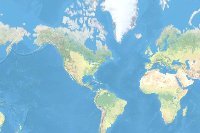

In [20]:
wm = WebMap()
wm.add_layer(capitals_item)
wm.save(
    {
        "title": "USA Capitals WebMap", 
        "tags": ["python", "webmap"], 
        "snippet": "A webmap that contains USA capitals as a feature layer."
    }
)

### Delete Feature Layer and re-publish
Why? This seems a bit weird to put in a sample, but this demonstrates how some feature layers can get deleted without us realizing that they are part of webmaps. Below we will get the webmap and see that the layer does not show up!   
This sample can then guide you to fix this problem of missing layers.

In [ ]:
capitals_item.delete()

<Item title:"USA Capitals spreadsheet for WebMap" type:Feature Layer Collection owner:arcgis_python>
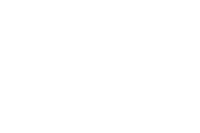

In [21]:
# re-publish so we can find it again
new_capitals = csv_item.publish()
new_capitals

## Using and updating a web map
We will search for that web map that has broken layers, render it on the notebook and update it.

In [ ]:
search_result = gis.content.search("title:USA Capitals WebMap", item_type = "Web Map")

Read the web map as a `WebMap` object

In [23]:
wm_item = search_result[0]
web_map_obj = WebMap(wm_item)


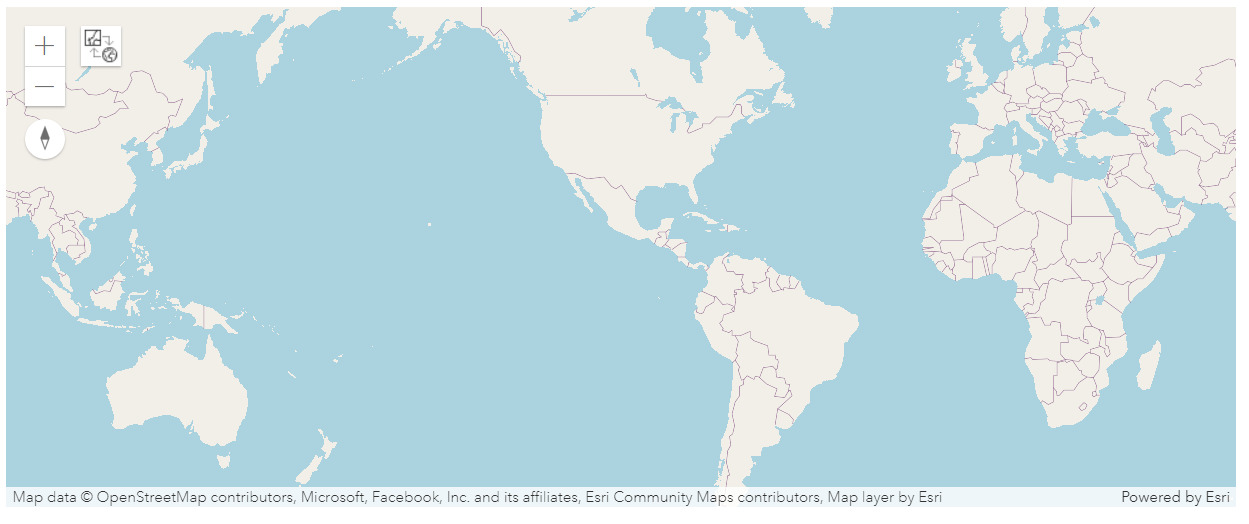

In [6]:
# display the web map obj in an interactive widget
web_map_obj

### Fix errors in web map
The widget loads an empty web map with just a basemap. Let us investigate the contents of the web map to determine the issue. You can query the layers in the web map using the `layers` property.

In [26]:
web_map_obj.layers

[{
   "title": "USA_Capitals_spreadsheet_for_WebMap",
   "opacity": 1,
   "visibility": true,
   "id": "5053d89e-4861-47a6-a4d3-3bbd9cc27bf0",
   "layerDefinition": {
     "definitionExpression": null,
     "drawingInfo": {
       "renderer": {
         "type": "simple",
         "symbol": {
           "type": "esriPMS",
           "url": "RedSphere.png",
           "imageData": "iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAACXBIWXMAAA7DAAAOwwHHb6hkAAAAGXRFWHRTb2Z0d2FyZQBQYWludC5ORVQgdjMuNS4xTuc4+QAAB3VJREFUeF7tmPlTlEcexnve94U5mANQbgQSbgiHXHINlxpRIBpRI6wHorLERUmIisKCQWM8cqigESVQS1Kx1piNi4mW2YpbcZONrilE140RCTcy3DDAcL/zbJP8CYPDL+9Ufau7uqb7eZ7P+/a8PS8hwkcgIBAQCAgEBAICAYGAQEAgIBAQCAgEBAICAYGAQEAgIBAQCDx/AoowKXFMUhD3lQrioZaQRVRS+fxl51eBTZUTdZ41U1Rox13/0JF9csGJ05Qv4jSz/YPWohtvLmSKN5iTGGqTm1+rc6weICOBRbZs1UVnrv87T1PUeovxyNsUP9P6n5cpHtCxu24cbrmwKLdj+osWiqrVKhI0xzbmZ7m1SpJ+1pFpvE2DPvGTomOxAoNLLKGLscZYvB10cbYYjrJCb

In [27]:
# Feature service item id for the missing layer:
web_map_obj.layers[0]["itemId"]

'eea32f0a785948b88d612e639cfa02a1'

The web map has only 1 layer and that points to a feature service named **USA_Capitals_spreadsheet_for_WebMap**. Let us verify if a feature service of that name exists on the server. If not, let us try to find the closest match.

In [28]:
search_result = gis.content.search('title:USA_Capitals_spreadsheet_for_WebMap', item_type = 'Feature Service')
display(search_result)

[<Item title:"USA Capitals spreadsheet for WebMap" type:Feature Layer Collection owner:arcgis_python>]

Let's check the itemId to make sure it is different. This means we have re-published it and the service was changed.

In [29]:
search_result[0].id

'62cf777b13ab4693897fccc5a00d76f7'

It is likely the old service was deleted and a new one was published. Let us update the web map with the new feature layer

In [30]:
capitals = search_result[0]
capitals.layers

[<FeatureLayer url:"https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/USA_Capitals_spreadsheet_for_WebMap/FeatureServer/0">]

The new feature service does have a layer with id `0`. Hence we can use the same layer id while switching the url. To remove the old layer, call `remove_layer()` method. Then add the correct `FeatureLayer` object by calling the `add_layer()` method on the `WebMap` object.

In [31]:
# remove the old layer from the web map
web_map_obj.remove_layer(web_map_obj.layers[0])

In [32]:
# add the correct layer. While adding you can customize the title
web_map_obj.add_layer(capitals.layers[0], options={'title':'USA Capitals'})

True

Check the layers on the web map

In [33]:
for lyr in web_map_obj.layers:
    print(lyr.title + " " + lyr.url)

USA Capitals https://services7.arcgis.com/JEwYeAy2cc8qOe3o/arcgis/rest/services/USA_Capitals_spreadsheet_for_WebMap/FeatureServer/0


### Update the web map
Now the web map should be fixed as it points to a live service. To update the web map, we call the `update()` method. You have the option to update the thumbnail or any other item properties at this time.

In [34]:
web_map_obj.update(item_properties={'title':'USA Capitals - updated'},
                  thumbnail = "./data/webmap_thumbnail.png")

True

Query the web map object to visualize it in the notebook


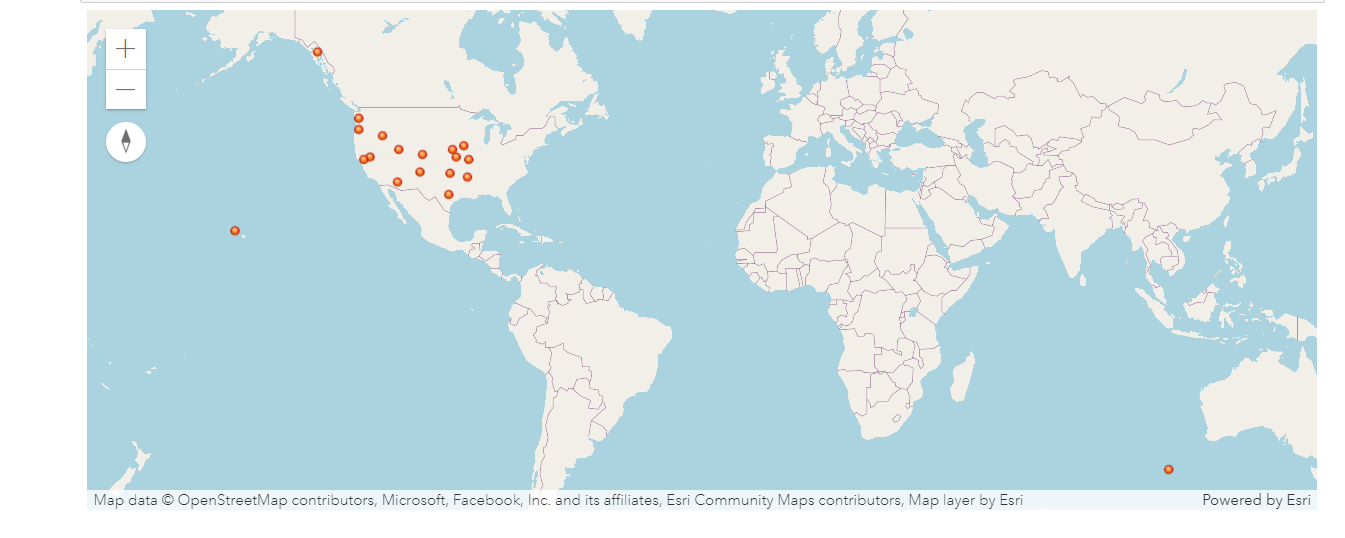

In [36]:
web_map_obj

The web map was sucessfully overwritten with correct operational layers. You can interact with the widget and zoom into the USA to observe the locations of capitals.

In [ ]:
# Let's clean it up so we can always run this notebook again
wm_item.delete()
new_capitals.delete()
csv_item.delete()

## Using and updating a web scene
In the sample above we observed how to update a web map. Updating the web scene is similar, we use the `update()` method. Let us look at the example of a web scene that displays tropical cyclones over the Pacific ocean.

<Item title:"Western Pacific Typhoons (2005)" type:Web Scene owner:esri_3d>
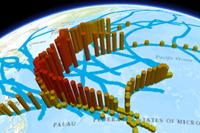

In [38]:
search_result = gis.content.search('title:Western Pacific Typhoons (2005)', 
                                   item_type = 'Web Scene', outside_org = True)
search_result[0]

Lets display the web scene in the notebook.


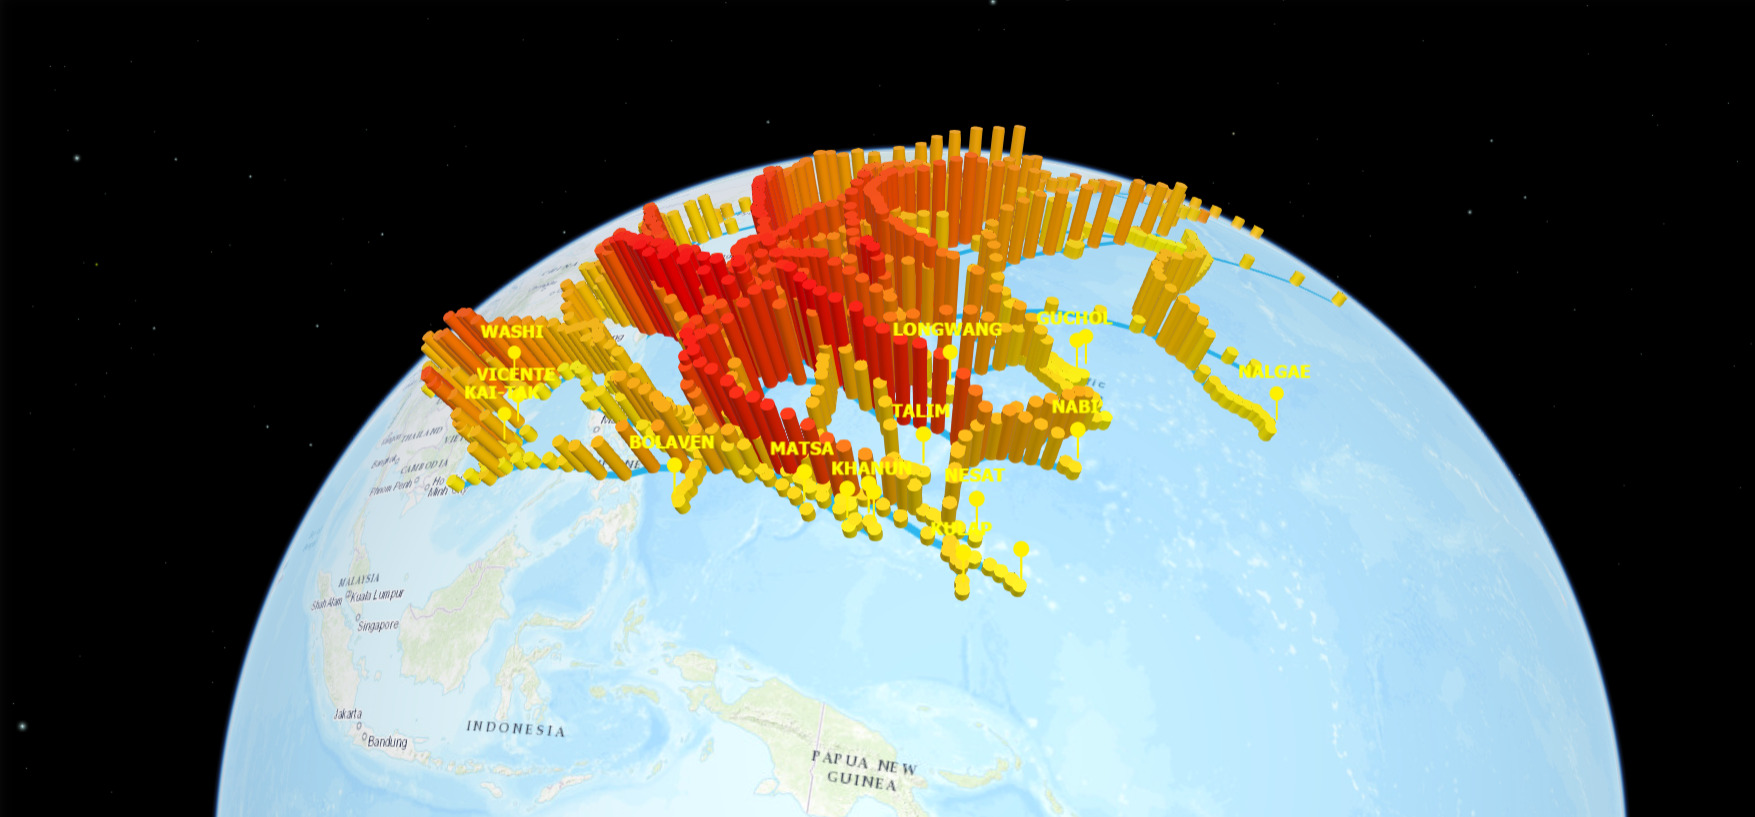

In [56]:
web_scene_item = search_result[0]
web_scene_obj = WebScene(web_scene_item)

# display web scene in the notebook
web_scene_obj

This is a great web scene and it displays a lot of hurricane tracks. However, we want to create a new one with only a particular subset of data and customize the basemaps. To modify this web scene, let us first make a copy of it and publish it into your portal.

### Make a copy of the public web scene item
To make a copy, we essentially download the content of the web scene JSON, remove the parts we don't want, add the layers that we want and publish a new item using that information. The publishing steps are similar to what is described earlier in the **data preparation** section and in detail in the sample titled **Publishing web maps and web scenes**.

Let's say, we are only interested in the storms that occur in summer. Summer in tropical Asia is around April-June and that matches with a layer in the existing web scene. Let us query the `operationalLayers` section of the web scene to understand what  the layers look like.

### Update operational layers of new web scene

In [40]:
display(web_scene_obj['operationalLayers'])

[{'id': '882ce65eceda4e2ba2ad65f9e2c0632f',
  'opacity': 1,
  'title': 'Typhoon Paths',
  'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/18',
  'visibility': True,
  'layerType': 'ArcGISFeatureLayer',
  'layerDefinition': {'minScale': 120000000,
   'maxScale': 0,
   'elevationInfo': {'mode': 'onTheGround'},
   'drawingInfo': {'renderer': {'type': 'simple',
     'description': '',
     'label': '',
     'symbol': {'type': 'LineSymbol3D',
      'symbolLayers': [{'material': {'color': [0, 169, 230]},
        'type': 'Line',
        'size': 5}]}}}},
  'popupInfo': {'showAttachments': False,
   'title': '{name}',
   'popupElements': [{'type': 'text'}],
   'description': "<div><p><span style='font-weight:bold;'>Typhoon {name}</span></p><p><span style='font-weight:bold;'>Started: </span><span>{datedescription}</span></p></div>"}},
 {'id': '14a37c86f84-layer21',
  'listMode': 'hide-children',
  'opacity': 1,
  'title': 'October -

There is a lot of information displayed above. Let us drill into this and display only layer names and their urls. If you notice, some of the layers above are group layers, meaning, they contain sub layers. So let us write a loop like below and print some details.

In [41]:
for layer in web_scene_obj['operationalLayers']:
    print(layer['title'] + " :: " + layer['layerType'])
    if layer['layerType'] == 'GroupLayer':
        for sub_layer in layer['layers']:
            print("\t" + sub_layer['title'] + " :: "+ sub_layer['url'])

Typhoon Paths :: ArcGISFeatureLayer
October - December :: GroupLayer
	Labels Q4 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/17
	Typhoons Q4 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/16
September :: GroupLayer
	Labels Q3_3 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/14
	Typhoons Q3_3 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/13
August :: GroupLayer
	Labels Q3_2 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/11
	Typhoons Q3_2 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/10
July :: GroupLayer
	Labels Q3_1 :: https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/8
	Typh

We are only interested in the layers that correspond to cyclones in summer. From the above report, we understand that information is in a group layer with two sub layers. Let us extract just that dictionary and compose a new web scene data.

In [42]:
# Let us construct a list comprehension and mine out that group layer.
subset_op_layers = [subset for subset in web_scene_obj['operationalLayers'] if subset['title'] == 'April - June']
display(subset_op_layers)

[{'id': '14a37c397dc-layer17',
  'listMode': 'hide-children',
  'opacity': 1,
  'title': 'April - June',
  'visibility': False,
  'layers': [{'id': '56803f3d64184140950f0ef1256a0603',
    'opacity': 1,
    'title': 'Labels Q2',
    'url': 'https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/PacificTyphoons2005_WFL/FeatureServer/5',
    'visibility': False,
    'layerType': 'ArcGISFeatureLayer',
    'layerDefinition': {'elevationInfo': {'mode': 'absoluteHeight'},
     'drawingInfo': {'renderer': {'type': 'simple',
       'visualVariables': [{'type': 'sizeInfo',
         'minSize': 25,
         'axis': 'all',
         'valueUnit': 'unknown'}],
       'description': '',
       'label': '',
       'symbol': {'type': 'styleSymbolReference',
        'styleName': 'EsriIconsStyle',
        'name': 'Pushpin 1'}}}},
    'showLabels': True,
    'popupInfo': {'showAttachments': True,
     'title': 'Labels Q2: {name}',
     'fieldInfos': [{'fieldName': 'typhoonid',
       'label': 'ty

In [43]:
# Let us apply the changes to a new web scene object.
new_web_scene_obj = web_scene_obj
new_web_scene_obj['operationalLayers'] = subset_op_layers

### Update basemap of new web scene
We now have the necessary `operationalLayers` information. Let us also try to change the basemap to a darker shade. First let us search the basemaps available in the current portal. If no suitable one is found, we can widen the search outside the organization and use a basemap published by Esri.

**Basemaps** are web maps that are stored in a **group** usually called **Basemaps**. Thus to get the list of basemaps available on a portal, we can find the basemaps group and list all web maps that are a part of it.

To get the list of groups on the portal, we use `groups` property of the `GIS` class.

<Item title:"Dark Gray Canvas" type:Web Map owner:esri>
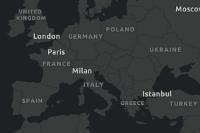

['basemap', 'esri_basemap', 'vector', 'canvas', 'dark', 'esri_vector', 'v2', 'general availability', 'basemaps', 'wma', 'World_Basemap_v2']


<Item title:"Human Geography Dark Map" type:Web Map owner:esri>
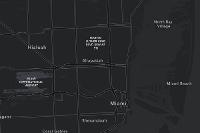

['vector', 'basemap', 'esri_vector', 'style', 'sample', 'web map', 'human geography', 'dark', 'human geography dark', 'esri_basemap', 'Andrew Skinner', 'creative']


<Item title:"NZ Dark Grey Canvas (Classic) (Mature Support) " type:Web Map owner:eaglegis>
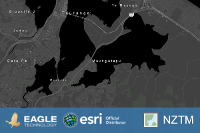

['NZ', 'New zealand', 'Basemap', 'Dark Canvas', 'Basemaps', 'esri_basemap', 'parcels', 'urban', 'public', 'Dark Grey', 'Canvas', 'New Zealand', 'Kiwi', 'Map', 'Background', 'Layer', 'topographic', 'topography', 'content', 'living atlas', 'basemaps', 'esri_basemaps', 'detailed', 'digital map', 'KiwiRail', 'Linz', 'NZTA', 'current', 'open data', 'data sets', 'mature support', 'deprecated', 'eaglegis']


<Item title:"Dark Gray Canvas (WGS84)" type:Web Map owner:esri>
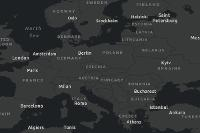

['esri_basemap', 'esri_vector', 'GCS', 'WGS84', 'canvas', 'dark gray', 'v2', 'general availability', 'basemaps', 'World_Basemap_GCS_v2', 'vector', 'basemap', 'gcs', 'wkid 4326']


<Item title:"Enhanced Contrast Dark Map" type:Web Map owner:esri_vector>
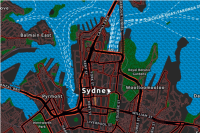

['enhanced contrast', 'dark', 'night', 'base', 'basemap', 'basemaps', 'esri_vector', 'Esri Vector Basemaps', 'esri_basemap', 'esri_basemaps', 'WGAC', 'Section 508', 'accessibility', 'reference', 'web map', 'wma', 'World_Basemap_v2', 'general availability']


<Item title:"Navigation (Dark)" type:Web Map owner:esri>
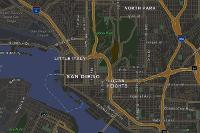

['v2', 'wma', 'World_Basemap_v2', 'global', 'basemaps', 'vector', 'basemap', 'esri_basemap', 'general availability', 'navigation', 'dark', 'dark mode', 'esri_vector']


<Item title:"Starter Map - Vector Layers (Dark Gray)" type:Web Map owner:cgis.script.runner>
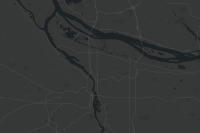

['Portland', 'PDX', 'Basemap', 'Gray', 'Dark']


<Item title:"Dark Gray Canvas" type:Web Map owner:esri_en>
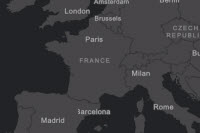

['basemap', 'vector']


<Item title:"Dark Gray Canvas" type:Web Map owner:esri_en>
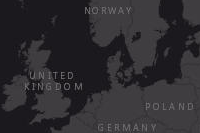

['basemap']


<Item title:"Dark Gray Canvas" type:Web Map owner:karmstrongSEEM>
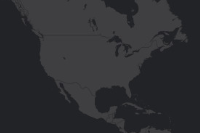

['basemap']


In [44]:
basemap_search = gis.content.search('title:dark', 
                                    outside_org=True, item_type='web map')
for item in basemap_search:
    display(item)
    print(item.tags)

We have found the basemap of our choice. Let us read it as a **`WebMap`** object and query the `baseMap` dictionary.

In [45]:
dark_basemap_item = basemap_search[-2]
dark_basemap_obj = WebMap(dark_basemap_item)
dark_basemap_obj.basemap

{
  "baseMapLayers": [
    {
      "opacity": 1,
      "title": "World Dark Gray Canvas Base",
      "url": "https://services.arcgisonline.com/arcgis/rest/services/Canvas/World_Dark_Gray_Base/MapServer",
      "visibility": true,
      "layerType": "ArcGISTiledMapServiceLayer",
      "id": "layer0"
    },
    {
      "opacity": 1,
      "title": "World Dark Gray Reference",
      "url": "https://services.arcgisonline.com/arcgis/rest/services/Canvas/World_Dark_Gray_Reference/MapServer",
      "visibility": true,
      "layerType": "ArcGISTiledMapServiceLayer",
      "isReference": true,
      "id": "World_Dark_Gray_Reference_8618"
    }
  ],
  "title": "Dark Gray Canvas"
}

Now let us explore what the `baseMap` dictionary of the **web scene** looks like.

In [46]:
new_web_scene_obj['baseMap']

{'baseMapLayers': [{'id': '73e9780a7d6f413f8547abbd19ec786c',
   'opacity': 1,
   'title': 'World Topo Map',
   'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer',
   'visibility': True,
   'layerType': 'ArcGISTiledMapServiceLayer'}],
 'id': 'basemap',
 'title': 'Topographic',
 'elevationLayers': [{'id': 'globalElevation_0',
   'listMode': 'hide',
   'title': 'Terrain3D',
   'url': 'https://elevation3d.arcgis.com/arcgis/rest/services/WorldElevation3D/Terrain3D/ImageServer',
   'visibility': True,
   'layerType': 'ArcGISTiledElevationServiceLayer'}]}

To get the desired basemap, we need to update the `url` key-value pair of the web scene's `baseMap` dictionary. Here we will pick the first layer of the dark basemap web map.

In [47]:
new_web_scene_obj['baseMap']['baseMapLayers'][0]['url'] = dark_basemap_obj.basemap['baseMapLayers'][0]['url']

Now that we have performed the necessary updates, we can go ahead and publish this as a new web scene item on our portal.

In [48]:
new_web_scene_properties= {'title':'Toprical Cyclones - Summer',
                          'type' : 'Web Scene',
                          'tags' : 'ArcGIS Python API',
                          'snippet' : str.format('Subset of <a href={2}>{0}</a> published by {1}',
                                                 web_scene_item.title, web_scene_item.owner,
                                                "https://www.arcgis.com/home/item.html?id=" + web_scene_item.id),
                          'text' : json.dumps(new_web_scene_obj)}

new_item = gis.content.add(new_web_scene_properties)
new_item

<Item title:"Toprical Cyclones - Summer" type:Web Scene owner:arcgis_python>

We have successfully published the new web scene. Now let us display in an interactive widget and observe if it has the necessary updates.


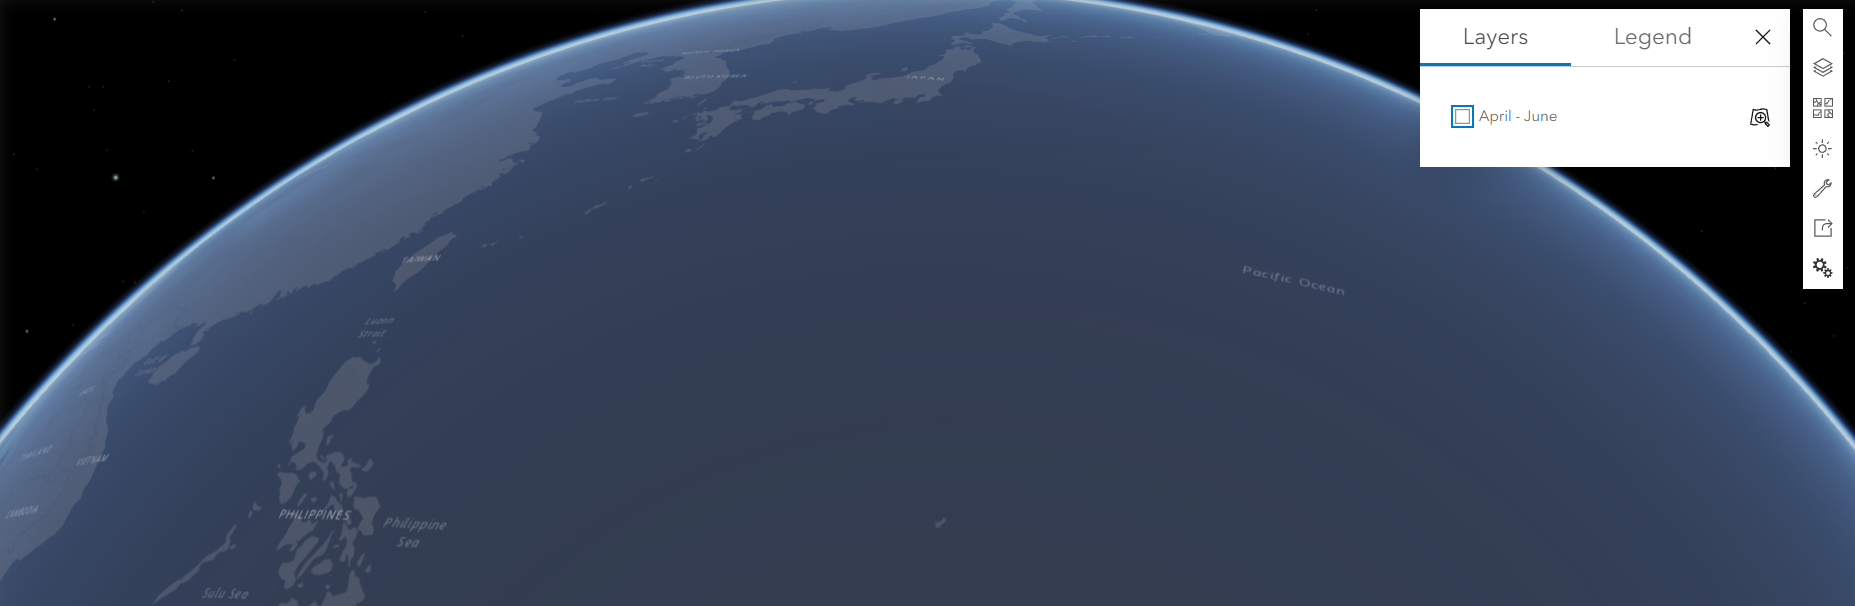

In [54]:
new_item.share(True)
new_web_scene_obj = WebScene(new_item)
new_web_scene_obj

Our required updates have been applied to the new web scene. However notice the **April - June** layer is **turned off** by default. Let us fix that and update the web scene.

Let us query the `operationalLayer` dictionary of the new web scene and look for a key called `visibility`.

In [51]:
for layer in new_web_scene_obj['operationalLayers']:
    print(layer['visibility'])

False


As we know, there is just 1 group layer and it is turned off. Let us change that and update the web scene.

In [52]:
for layer in new_web_scene_obj['operationalLayers']:
    layer['visibility'] = True

To update the web scene call the `update()` method on the web scene object.


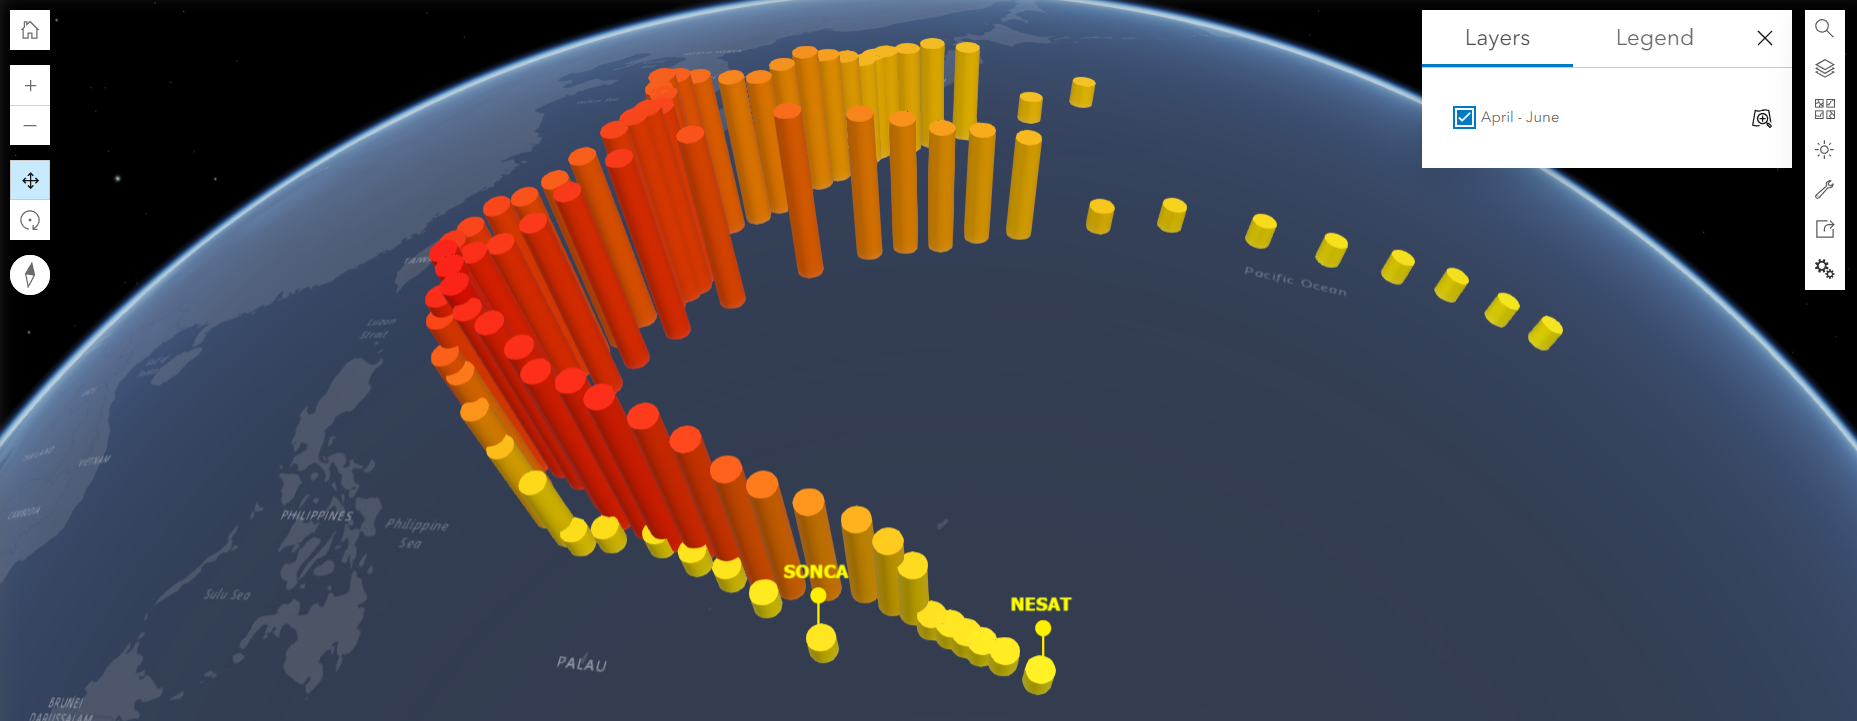

In [55]:
new_web_scene_obj.update()
new_web_scene_obj

## Summary
In this sample, we observed how to consume web maps, web scenes and how to update them. During this process, the sample showed how to read a web feature layers, how to use geocoding to get co-ordinates of a point of interest, how to modify the map widget using code, how to make copy of an existing item into your account, how to look for basemaps and finally, how to update layer properties within a web scene.